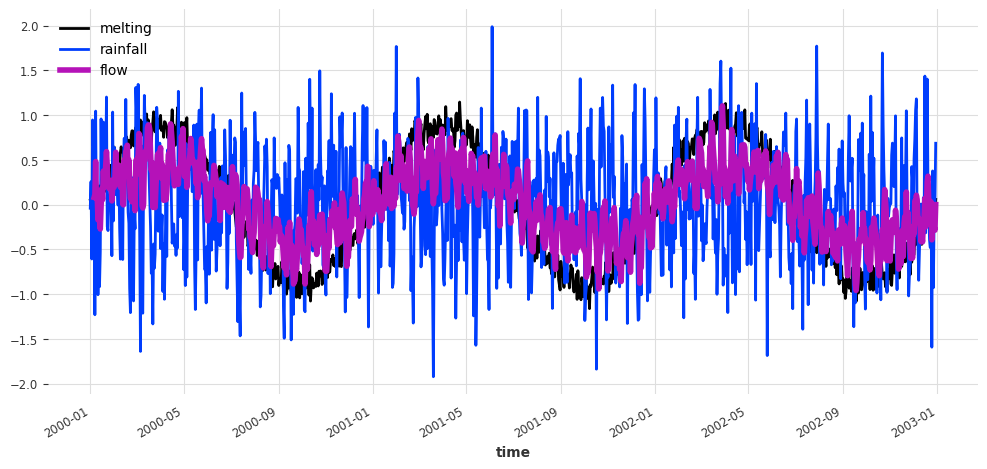

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from darts.utils import timeseries_generation as tg

np.random.seed(42)

LENGTH = 3 * 365  # 3 years of daily data

# Melting: a sine with yearly periodicity and additive white noise
melting = (0.9 * tg.sine_timeseries(length=LENGTH, value_frequency=(1/365), 
                              freq='D', 
                              column_name='melting')
           + 0.1 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# Rainfalls: a sine with bi-weekly periodicity and additive white noise
rainfalls = (0.5 * tg.sine_timeseries(length=LENGTH, 
                                value_frequency=(1/14), 
                                freq='D', 
                                column_name='rainfall')
             + 0.5 * tg.gaussian_timeseries(length=LENGTH, freq='D'))

# We shift the melting by 5 days
melting_contribution = 0.5 * melting.shift(5)

# We compute similar contribution from the rainfalls
all_contributions = [melting_contribution] + [0.1 * rainfalls.shift(lag) for lag in range(5)]

# We compute the final flow as the sum of everything; trimming series so they
# all have the same start time
flow = sum([series[melting_contribution.start_time():][:melting.end_time()]
            for series in all_contributions]).with_columns_renamed('melting', 'flow')

# add some white noise
flow += 0.1 * tg.gaussian_timeseries(length=len(flow))

plt.figure(figsize=(12,5))
melting.plot()
rainfalls.plot()
flow.plot(lw=4)

In [10]:
import pandas as pd
df = pd.concat([melting.pd_dataframe(), rainfalls.pd_dataframe(), flow.pd_dataframe()], axis=1)

In [19]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-12-21', '2002-12-22', '2002-12-23', '2002-12-24',
               '2002-12-25', '2002-12-26', '2002-12-27', '2002-12-28',
               '2002-12-29', '2002-12-30'],
              dtype='datetime64[ns]', name='time', length=1095, freq='D')

In [20]:
df.index = df.index.tz_localize('UTC')
df.to_csv('river_flow.csv')